
# CODE TO CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER
# Dr. Ryan @STEMplicity
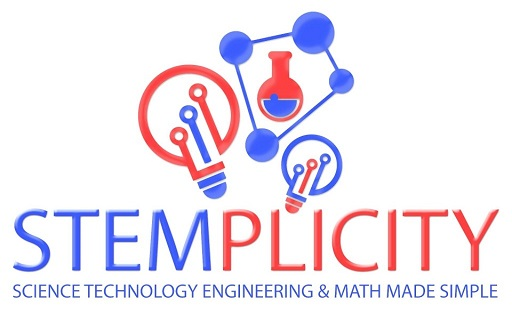



# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

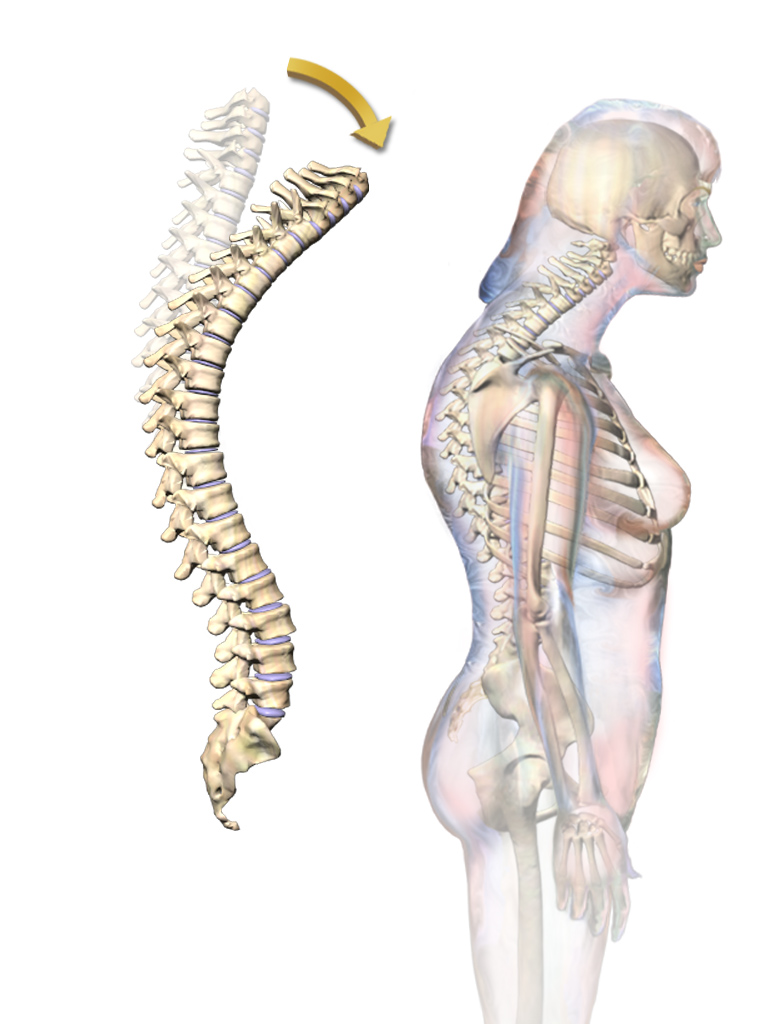

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [3]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
dir(df)

['Age',
 'Kyphosis',
 'Number',
 'Start',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_

In [9]:
df.value_counts()

Kyphosis  Age  Number  Start
absent    1    2       16       1
               3       9        1
                       16       1
               4       12       1
                       15       1
                               ..
present   128  4       5        1
          130  4       1        1
          139  3       10       1
               10      6        1
          157  3       13       1
Name: count, Length: 81, dtype: int64

In [13]:
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


# STEP #2: VISUALIZE DATASET

In [14]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [15]:
df.Kyphosis

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

/tmp/ipykernel_613185/2405764471.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kyphosis', data=df, palette='mako')


<Axes: xlabel='Kyphosis', ylabel='count'>

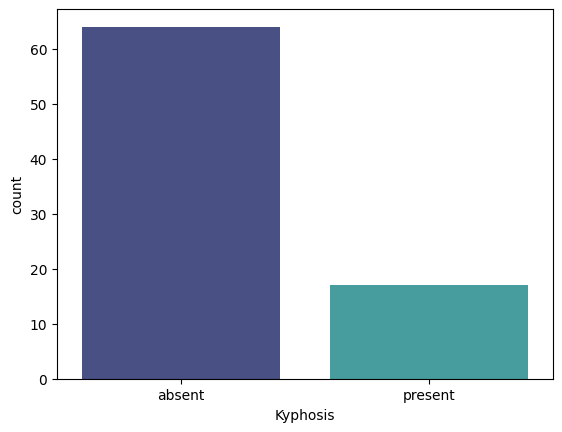

In [17]:
sns.countplot(x='Kyphosis', data=df, palette='mako')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
df.Kyphosis = le.fit_transform(df.Kyphosis)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [22]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [25]:
no_disease = df[df.Kyphosis == 0]
no_disease.shape

(64, 4)

In [28]:
positive = df[df.Kyphosis == 1]
positive.shape

(17, 4)

In [31]:
print(f"Disease present after operation percentage = {round(len(positive) / len(df)*100,2)}%")

Disease present after operation percentage = 20.99%


In [33]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: >

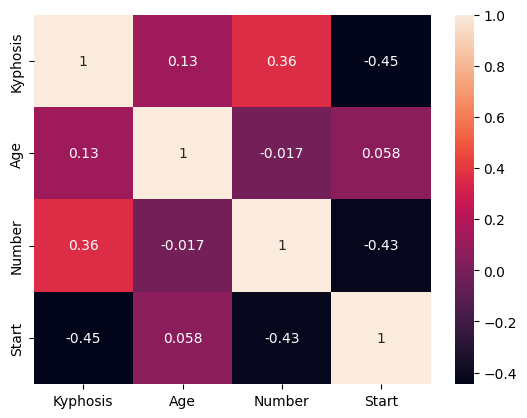

In [34]:
sns.heatmap(df.corr(), annot=True, fmt='.2g')

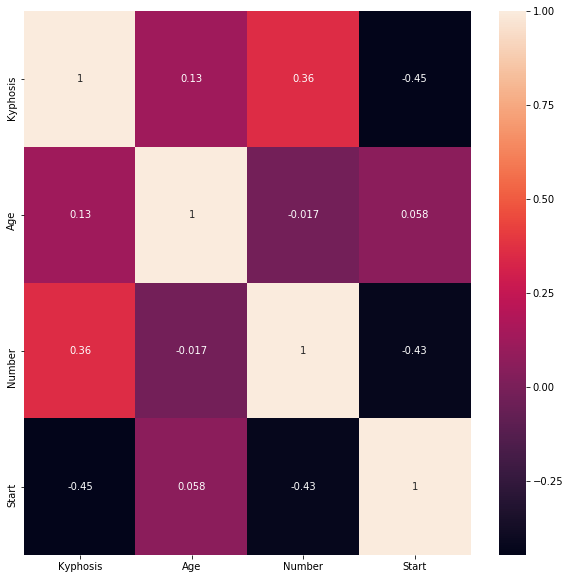

In [13]:
df

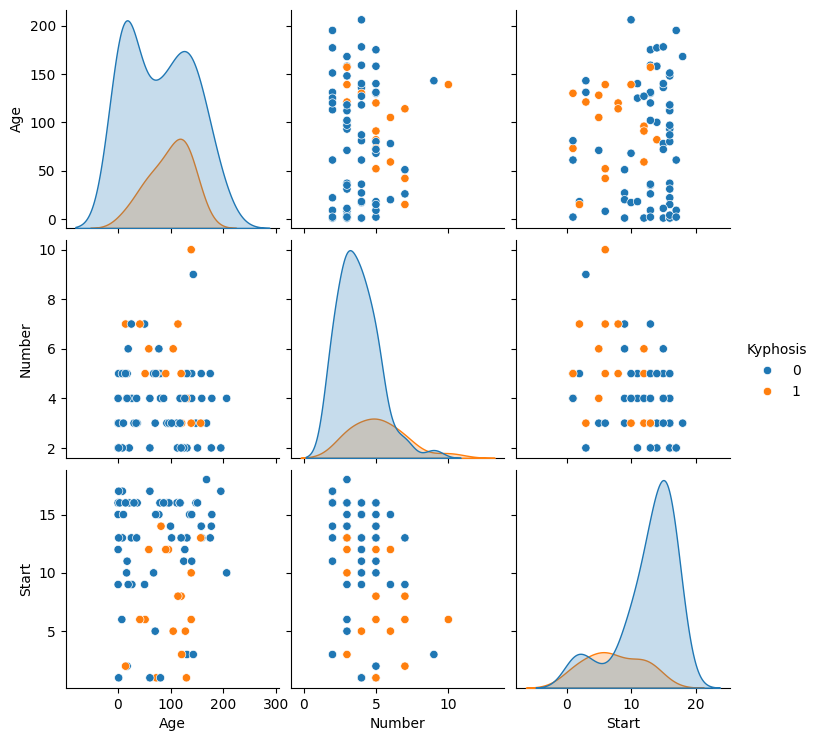

In [35]:
sns.pairplot(df, hue='Kyphosis')

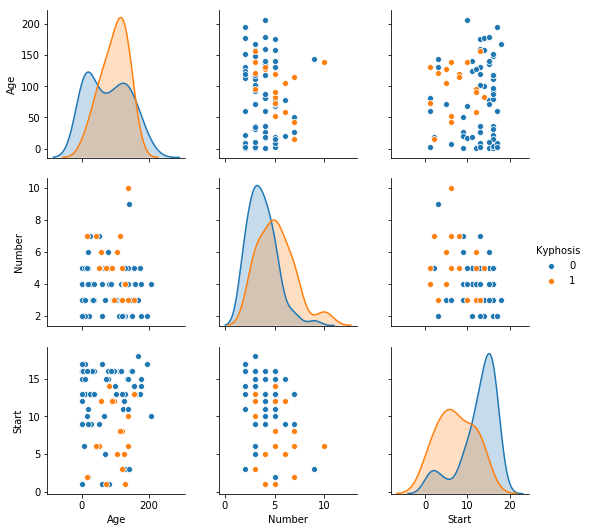

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [36]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [39]:
X = df.drop('Kyphosis', axis=1)
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [40]:
y = df.Kyphosis
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Kyphosis, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =5 )

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60, 3), (60,), (21, 3), (21,))

# STEP#4: TRAINING THE MODEL

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      0.12      0.22         8

    accuracy                           0.67        21
   macro avg       0.82      0.56      0.51        21
weighted avg       0.78      0.67      0.57        21



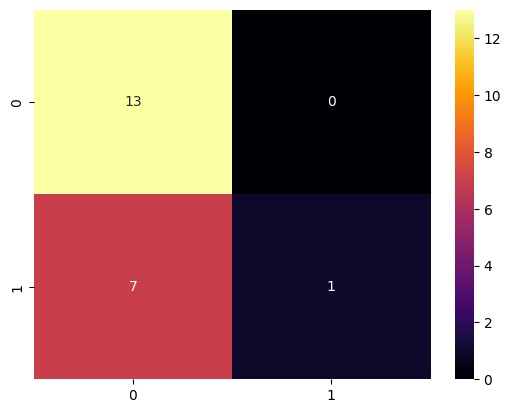

In [57]:


rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)

cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')

print(classification_report(y_test, y_test_predict))


              precision    recall  f1-score   support

           0       0.58      0.85      0.69        13
           1       0.00      0.00      0.00         8

    accuracy                           0.52        21
   macro avg       0.29      0.42      0.34        21
weighted avg       0.36      0.52      0.43        21



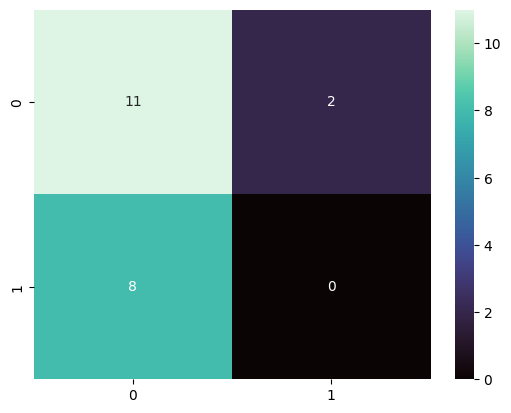

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_test_predict = decision_tree.predict(X_test)

cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='mako')

print(classification_report(y_test, y_test_predict))

In [59]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
dir(decision_tree)

['_BaseDecisionTree__metadata_request__predict',
 '_DecisionTreeClassifier__metadata_request__fit',
 '_DecisionTreeClassifier__metadata_request__predict_proba',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_missing_values_in_feature_mask',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags'

In [61]:
decision_tree.feature_importances_

array([0.52699026, 0.12462392, 0.34838582])

# importing libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [66]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [70]:
df.Kyphosis.unique()

array(['absent', 'present'], dtype=object)

In [71]:
df.Age.unique

<bound method Series.unique of 0      71
1     158
2     128
3       2
4       1
     ... 
76    157
77     26
78    120
79     42
80     36
Name: Age, Length: 81, dtype: int64>

In [73]:
df.Age.nunique()

64

In [72]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [74]:
df.Number.nunique()

8

In [75]:
df.Start.nunique()

16

In [67]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [76]:
dir(df)

['Age',
 'Kyphosis',
 'Number',
 'Start',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [78]:
df.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [79]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [80]:
df.shape

(81, 4)

/tmp/ipykernel_613185/2405764471.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kyphosis', data=df, palette='mako')


<Axes: xlabel='Kyphosis', ylabel='count'>

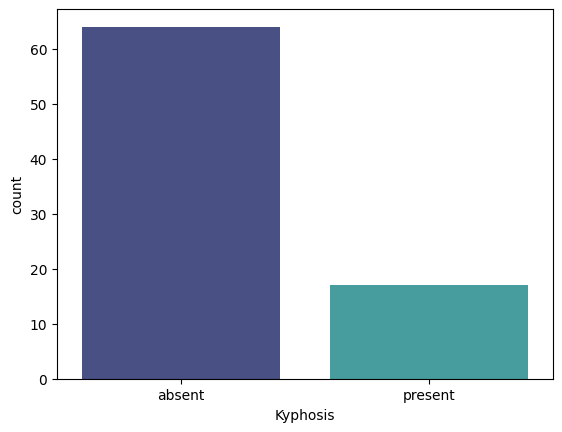

In [81]:
sns.countplot(x='Kyphosis', data=df, palette='mako')

In [82]:
?sns.countplot

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

In [83]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that :func:`histplot` function offers similar functionality with additional
    features (e.g. bar stacking), although its default behavior is somewhat different.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
        By default, this function treats one of the variables 

In [84]:
help(sns.palettes)

Help on module seaborn.palettes in seaborn:

NAME
    seaborn.palettes

FUNCTIONS
    blend_palette(colors, n_colors=6, as_cmap=False, input='rgb')
        Make a palette that blends between a list of colors.
        
        Parameters
        ----------
        colors : sequence of colors in various formats interpreted by `input`
            hex code, html color name, or tuple in `input` space.
        n_colors : int, optional
            Number of colors in the palette.
        as_cmap : bool, optional
            If True, return a :class:`matplotlib.colors.ListedColormap`.
        
        Returns
        -------
        palette
            list of RGB tuples or :class:`matplotlib.colors.ListedColormap`
        
        Examples
        --------
        .. include: ../docstrings/blend_palette.rst
    
    color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
        Return a list of colors or continuous colormap defining a palette.
        
        Possible ``palett

In [105]:
help(sns.palettes)

Help on module seaborn.palettes in seaborn:

NAME
    seaborn.palettes

FUNCTIONS
    blend_palette(colors, n_colors=6, as_cmap=False, input='rgb')
        Make a palette that blends between a list of colors.
        
        Parameters
        ----------
        colors : sequence of colors in various formats interpreted by `input`
            hex code, html color name, or tuple in `input` space.
        n_colors : int, optional
            Number of colors in the palette.
        as_cmap : bool, optional
            If True, return a :class:`matplotlib.colors.ListedColormap`.
        
        Returns
        -------
        palette
            list of RGB tuples or :class:`matplotlib.colors.ListedColormap`
        
        Examples
        --------
        .. include: ../docstrings/blend_palette.rst
    
    color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
        Return a list of colors or continuous colormap defining a palette.
        
        Possible ``palett

In [110]:
help(sns.colors.crayons)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [107]:
?sns.countplot

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

In [112]:
help(sns.palettes)

Help on module seaborn.palettes in seaborn:

NAME
    seaborn.palettes

FUNCTIONS
    blend_palette(colors, n_colors=6, as_cmap=False, input='rgb')
        Make a palette that blends between a list of colors.
        
        Parameters
        ----------
        colors : sequence of colors in various formats interpreted by `input`
            hex code, html color name, or tuple in `input` space.
        n_colors : int, optional
            Number of colors in the palette.
        as_cmap : bool, optional
            If True, return a :class:`matplotlib.colors.ListedColormap`.
        
        Returns
        -------
        palette
            list of RGB tuples or :class:`matplotlib.colors.ListedColormap`
        
        Examples
        --------
        .. include: ../docstrings/blend_palette.rst
    
    color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
        Return a list of colors or continuous colormap defining a palette.
        
        Possible ``palett

/tmp/ipykernel_613185/266873666.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kyphosis', data=df, palette=sns.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False))
/tmp/ipykernel_613185/266873666.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Kyphosis', data=df, palette=sns.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False))


<Axes: xlabel='Kyphosis', ylabel='count'>

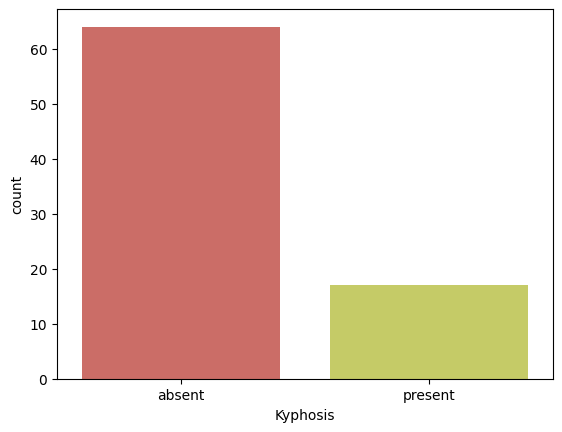

In [102]:
sns.countplot(x='Kyphosis', data=df, palette=sns.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False))

/tmp/ipykernel_613185/1961841794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kyphosis', data=df, palette=sns.diverging_palette(100, 200., s=75, l=80, sep=1, n=6, center='light', as_cmap=False))
/tmp/ipykernel_613185/1961841794.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Kyphosis', data=df, palette=sns.diverging_palette(100, 200., s=75, l=80, sep=1, n=6, center='light', as_cmap=False))


<Axes: xlabel='Kyphosis', ylabel='count'>

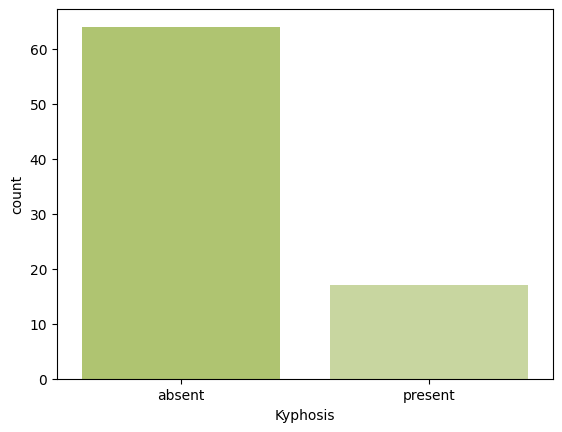

In [101]:
sns.countplot(x='Kyphosis', data=df, palette=sns.diverging_palette(100, 200., s=75, l=80, sep=1, n=6, center='light', as_cmap=False))

/tmp/ipykernel_613185/1335421808.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kyphosis', data=df, palette=sns.dark_palette('green', n_colors=6, reverse=False, as_cmap=False, input='rgb'))
/tmp/ipykernel_613185/1335421808.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Kyphosis', data=df, palette=sns.dark_palette('green', n_colors=6, reverse=False, as_cmap=False, input='rgb'))


<Axes: xlabel='Kyphosis', ylabel='count'>

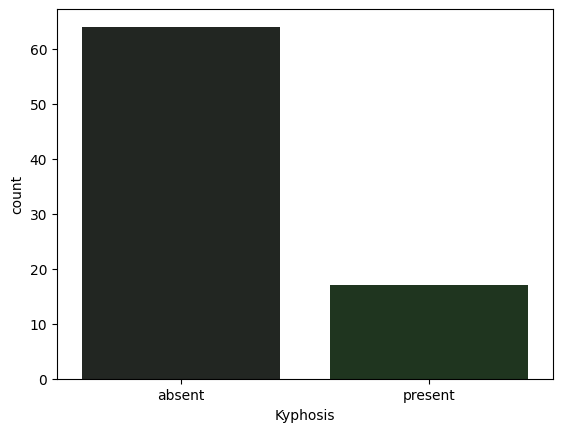

In [92]:
sns.countplot(x='Kyphosis', data=df, palette=sns.dark_palette('green', n_colors=6, reverse=False, as_cmap=False, input='rgb'))

/tmp/ipykernel_613185/1403673389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kyphosis', data=df, palette=sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=False))
/tmp/ipykernel_613185/1403673389.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Kyphosis', data=df, palette=sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=False))


<Axes: xlabel='Kyphosis', ylabel='count'>

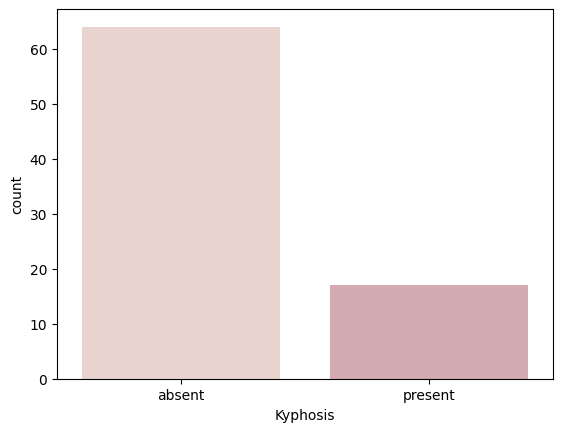

In [87]:
sns.countplot(x='Kyphosis', data=df, palette=sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=False))

In [113]:
from sklearn.preprocessing import LabelEncoder

In [115]:
?LabelEncoder

Init signature: LabelEncoder()
Docstring:     
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, *i.e.* `y`, and
not the input `X`.

Read more in the :ref:`User Guide <preprocessing_targets>`.

.. versionadded:: 0.12

Attributes
----------
classes_ : ndarray of shape (n_classes,)
    Holds the label for each class.

See Also
--------
OrdinalEncoder : Encode categorical features using an ordinal encoding
    scheme.
OneHotEncoder : Encode categorical features as a one-hot numeric array.

Examples
--------
`LabelEncoder` can be used to normalize labels.

>>> from sklearn.preprocessing import LabelEncoder
>>> le = LabelEncoder()
>>> le.fit([1, 2, 2, 6])
LabelEncoder()
>>> le.classes_
array([1, 2, 6])
>>> le.transform([1, 1, 2, 6])
array([0, 0, 1, 2]...)
>>> le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6])

It can also be used to transform non-numerical labels (as long as they are
hashable and comparable) to numerical

In [116]:
help(LabelEncoder)

Help on class LabelEncoder in module sklearn.preprocessing._label:

class LabelEncoder(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Encode target labels with value between 0 and n_classes-1.
 |  
 |  This transformer should be used to encode target values, *i.e.* `y`, and
 |  not the input `X`.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  .. versionadded:: 0.12
 |  
 |  Attributes
 |  ----------
 |  classes_ : ndarray of shape (n_classes,)
 |      Holds the label for each class.
 |  
 |  See Also
 |  --------
 |  OrdinalEncoder : Encode categorical features using an ordinal encoding
 |      scheme.
 |  OneHotEncoder : Encode categorical features as a one-hot numeric array.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn.preprocessing import LabelEncoder
 |  >>> le = LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >>>

In [114]:
le = LabelEncoder()

In [117]:
df.Kyphosis

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [118]:
dir(le)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'inverse_transform',
 'set_output',
 'set_params',
 'transform']

In [120]:
df['kyphosis2']=le.fit_transform(df.Kyphosis)
df.head()

,Kyphosis,Age,Number,Start,kyphosis2
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


In [122]:
df.drop('kyphosis2', axis=1, inplace=True)

In [123]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [124]:
df.Kyphosis = le.fit_transform(df.Kyphosis)
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [128]:
negative = df[df.Kyphosis == 0]
negative.head()


,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [131]:
positive = df[df.Kyphosis == 1]
positive.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


<Axes: xlabel='Start', ylabel='Count'>

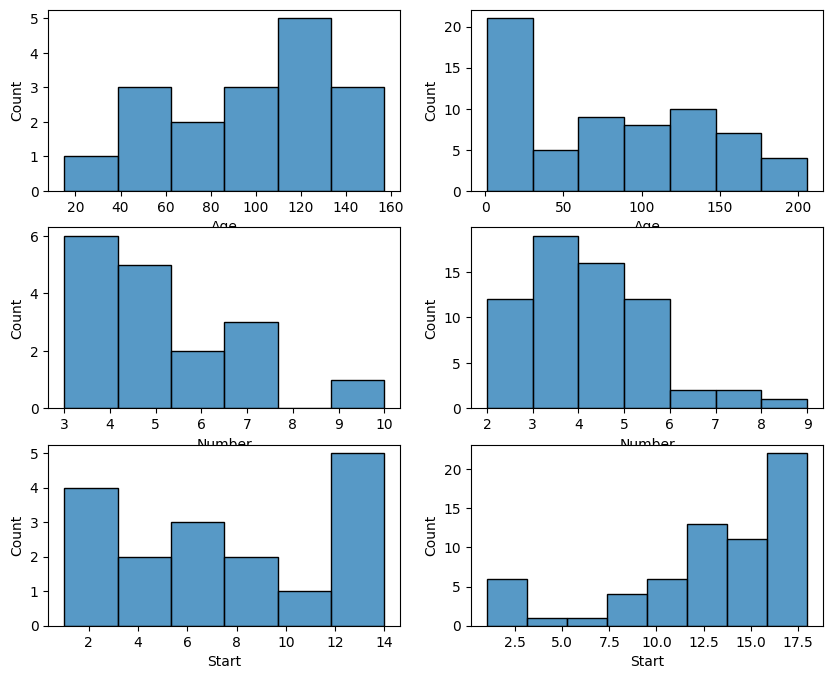

In [139]:
plt.figure(figsize=(10,8))
plt.subplot(321)
sns.histplot(x='Age', data=positive)

plt.subplot(322)
sns.histplot(x='Age', data=negative)

plt.subplot(323)
sns.histplot(x='Number', data=positive)

plt.subplot(324)
sns.histplot(x='Number', data=negative)

plt.subplot(325)
sns.histplot(x='Start', data=positive)

plt.subplot(326)
sns.histplot(x='Start', data=negative)

In [142]:
?sns.histplot

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

In [143]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

<Axes: xlabel='Age', ylabel='Count'>

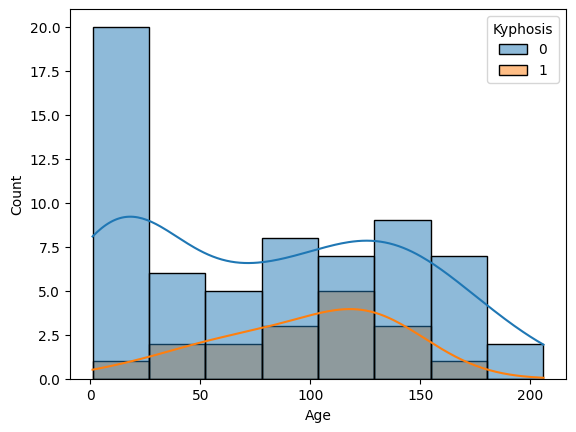

In [148]:
sns.histplot(x='Age', data=df, hue='Kyphosis', multiple='layer', kde=True, stat='count')

<Axes: xlabel='Age', ylabel='Count'>

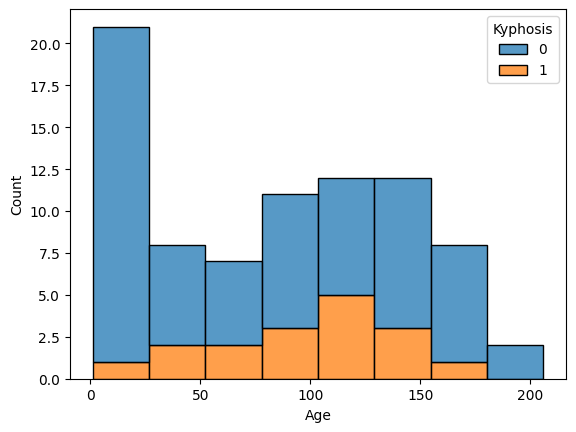

In [145]:
sns.histplot(x='Age', data=df, hue='Kyphosis', multiple='stack')

<Axes: xlabel='Age', ylabel='Count'>

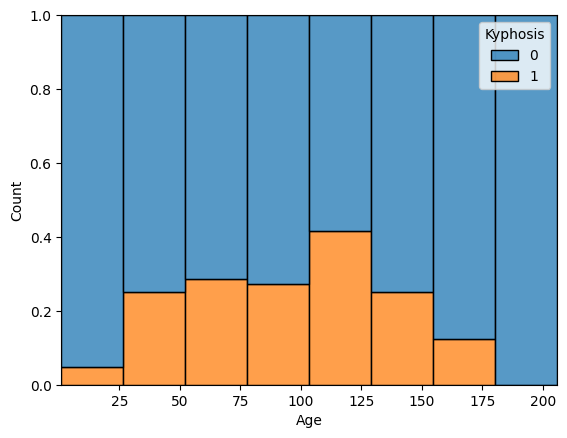

In [144]:
sns.histplot(x='Age', data=df, hue='Kyphosis', multiple='fill')

<Axes: xlabel='Age', ylabel='Count'>

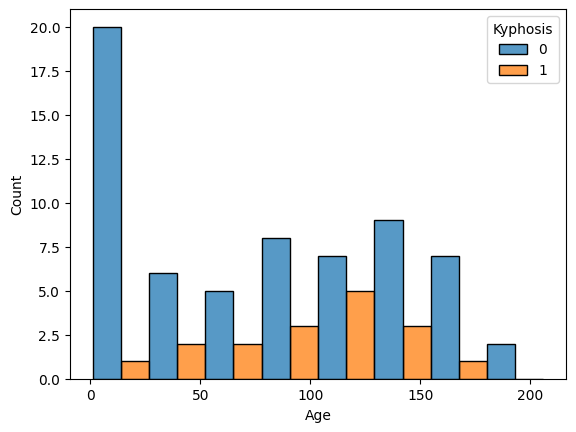

In [141]:
sns.histplot(x='Age', data=df, hue='Kyphosis', multiple='dodge')

In [155]:
print('Disease present after operation percentage = ', round(len(positive)/len(df),3)*100, '%')

Disease present after operation percentage =  21.0 %


In [157]:
print(f"Disease not present after operation percentage = {round(len(negative)/len(df),2) * 100} %")

Disease not present after operation percentage = 79.0 %


In [158]:
df.corr()

,Kyphosis,Age,Number,Start
Kyphosis,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


In [163]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [165]:
help(sns.palettes)

Help on module seaborn.palettes in seaborn:

NAME
    seaborn.palettes

FUNCTIONS
    blend_palette(colors, n_colors=6, as_cmap=False, input='rgb')
        Make a palette that blends between a list of colors.
        
        Parameters
        ----------
        colors : sequence of colors in various formats interpreted by `input`
            hex code, html color name, or tuple in `input` space.
        n_colors : int, optional
            Number of colors in the palette.
        as_cmap : bool, optional
            If True, return a :class:`matplotlib.colors.ListedColormap`.
        
        Returns
        -------
        palette
            list of RGB tuples or :class:`matplotlib.colors.ListedColormap`
        
        Examples
        --------
        .. include: ../docstrings/blend_palette.rst
    
    color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
        Return a list of colors or continuous colormap defining a palette.
        
        Possible ``palett

<Axes: >

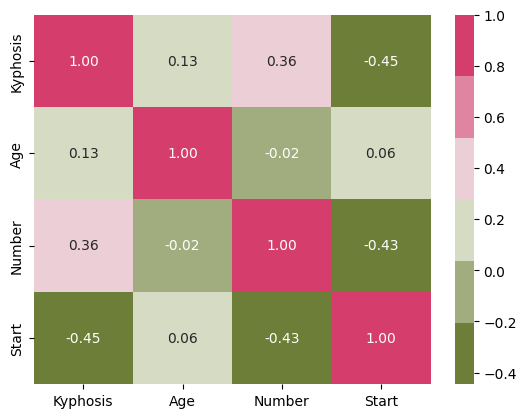

In [181]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(100, 359, s=75, l=50, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

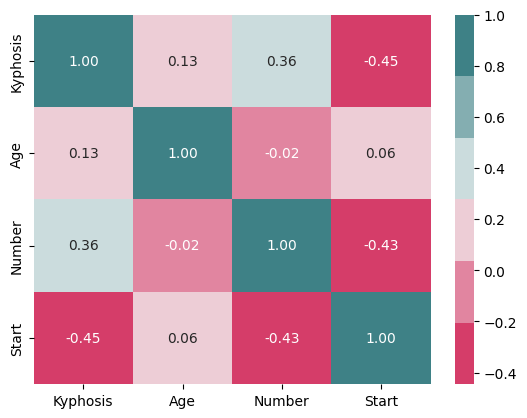

In [180]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 200, s=75, l=50, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

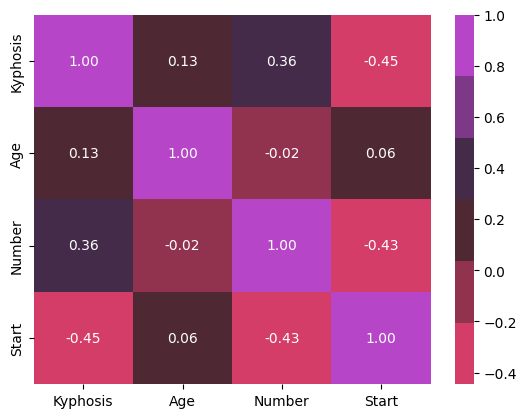

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 300, s=75, l=50, sep=1, n=6, center='dark', as_cmap=False))

<Axes: >

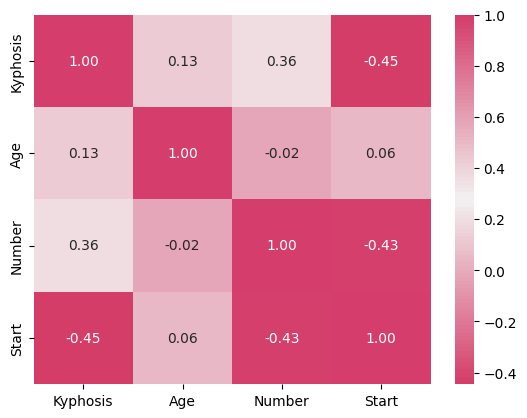

In [177]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=75, l=50, sep=1, n=100, center='light', as_cmap=False))

<Axes: >

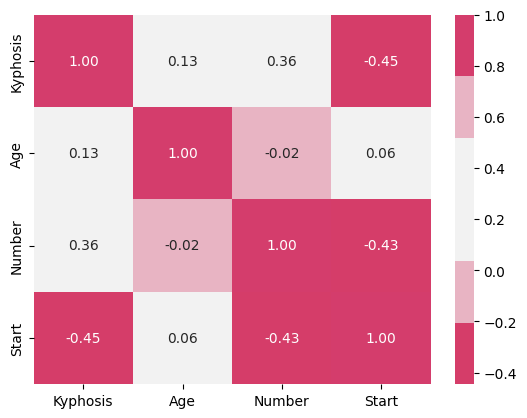

In [175]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=75, l=50, sep=100, n=6, center='light', as_cmap=False))

<Axes: >

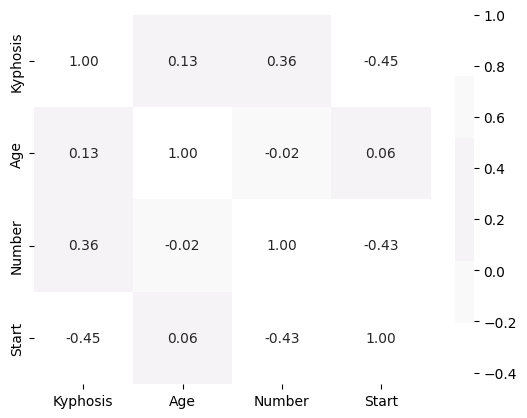

In [171]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=75, l=100, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

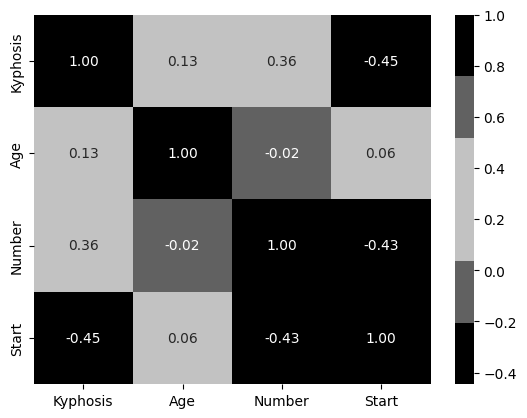

In [170]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=75, l=0, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

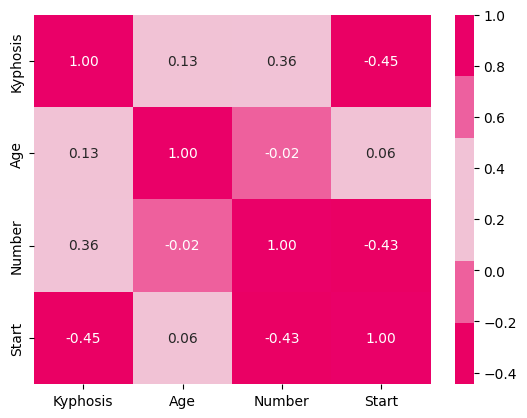

In [169]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=100, l=50, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

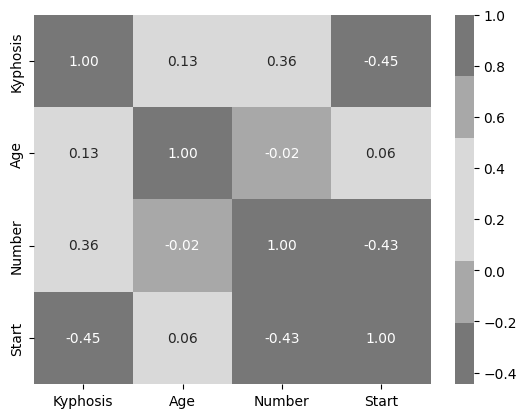

In [168]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=0, l=50, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

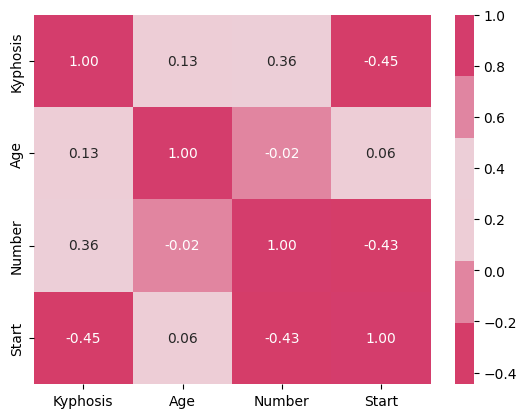

In [167]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(0, 359, s=75, l=50, sep=1, n=6, center='light', as_cmap=False))

<Axes: >

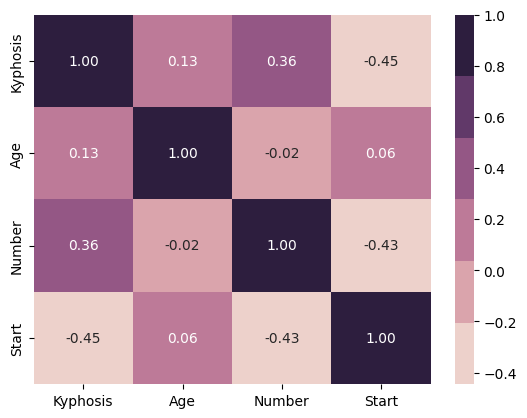

In [166]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=False))

<Axes: >

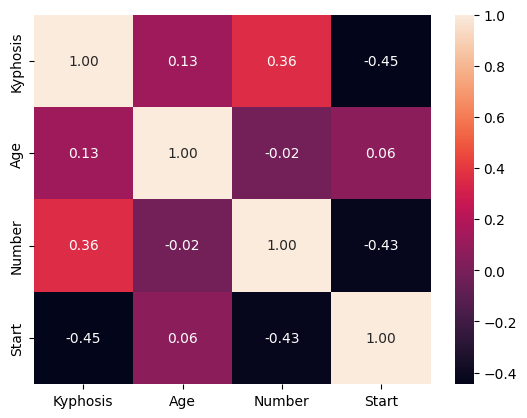

In [161]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [184]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

In [190]:
vars = [df.columns]
vars

[Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')]

In [193]:
var2 = [ 'Age', 'Number', 'Start']

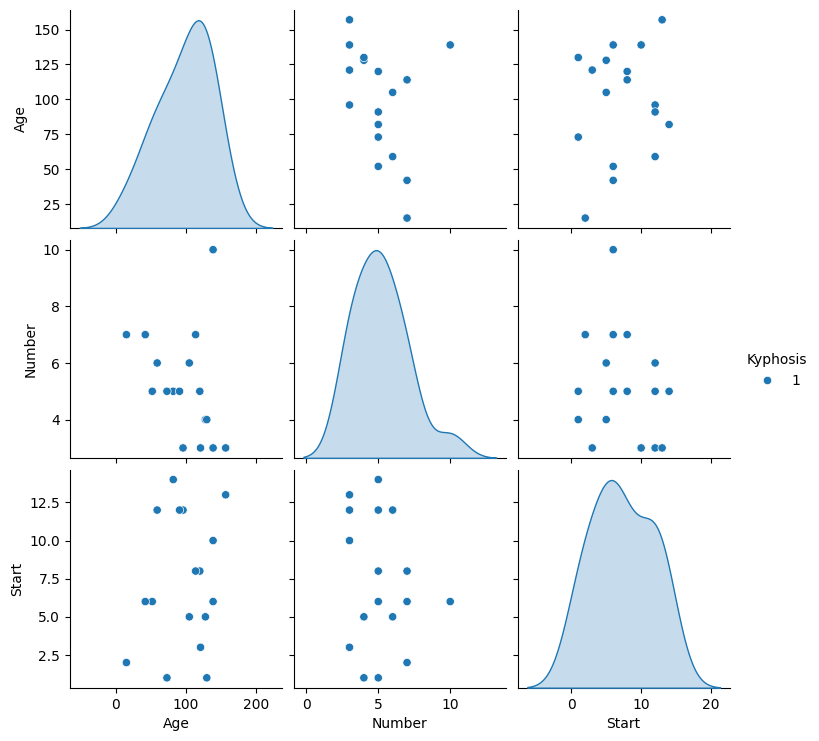

In [195]:
sns.pairplot(vars=var2, data=positive, hue='Kyphosis', kind='scatter')

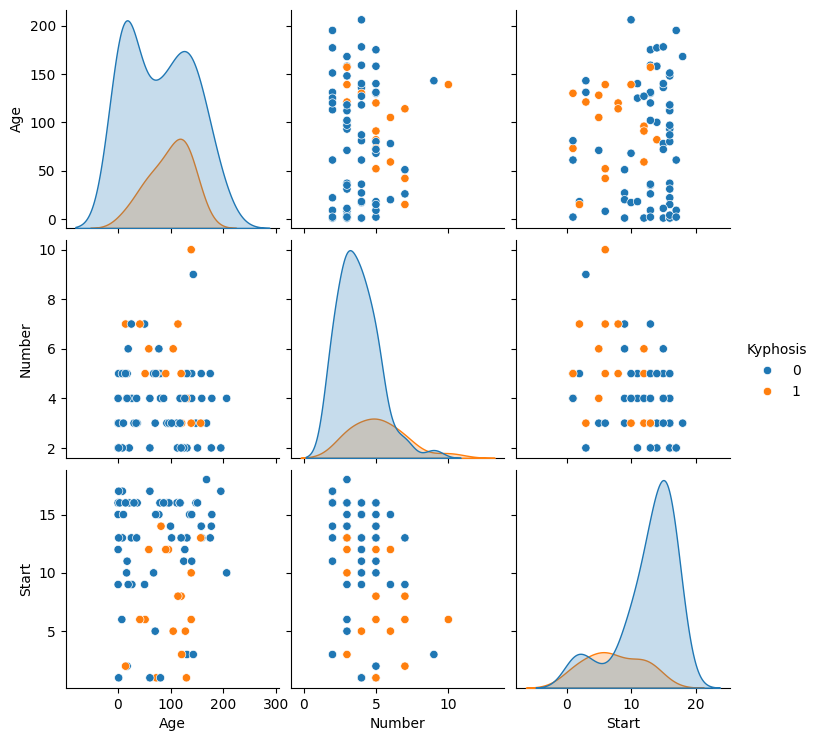

In [194]:
sns.pairplot(vars=var2, data=df, hue="Kyphosis", kind='scatter')

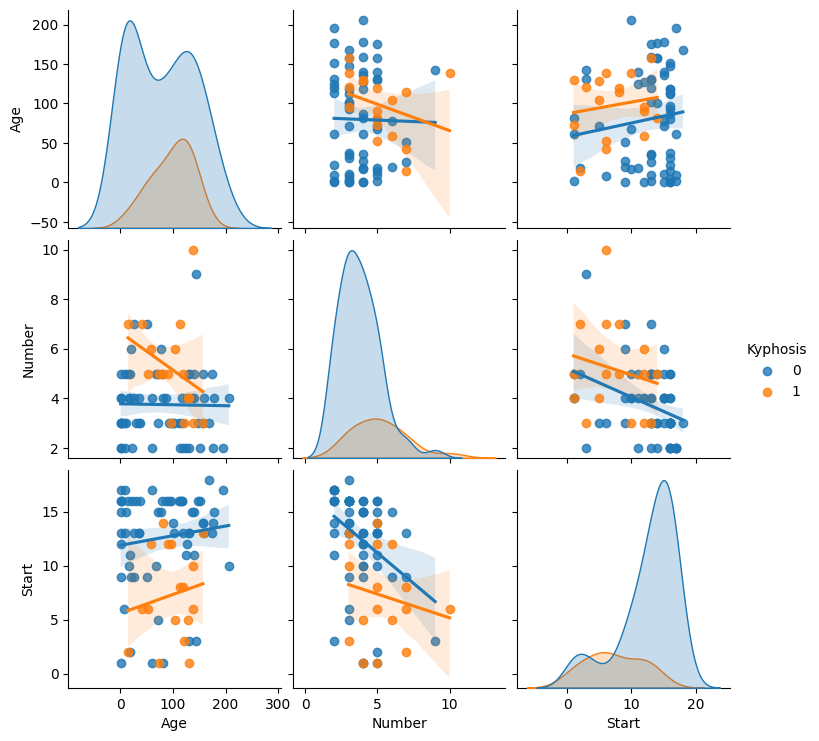

In [186]:
sns.pairplot(data=df, hue='Kyphosis', kind='reg')

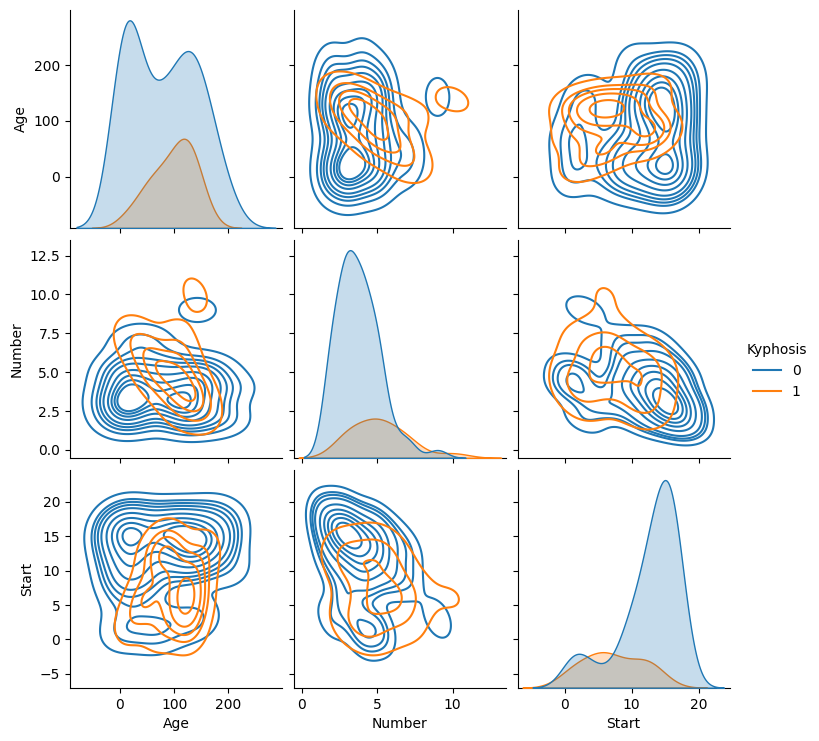

In [185]:
sns.pairplot(data=df, hue='Kyphosis', kind='kde')

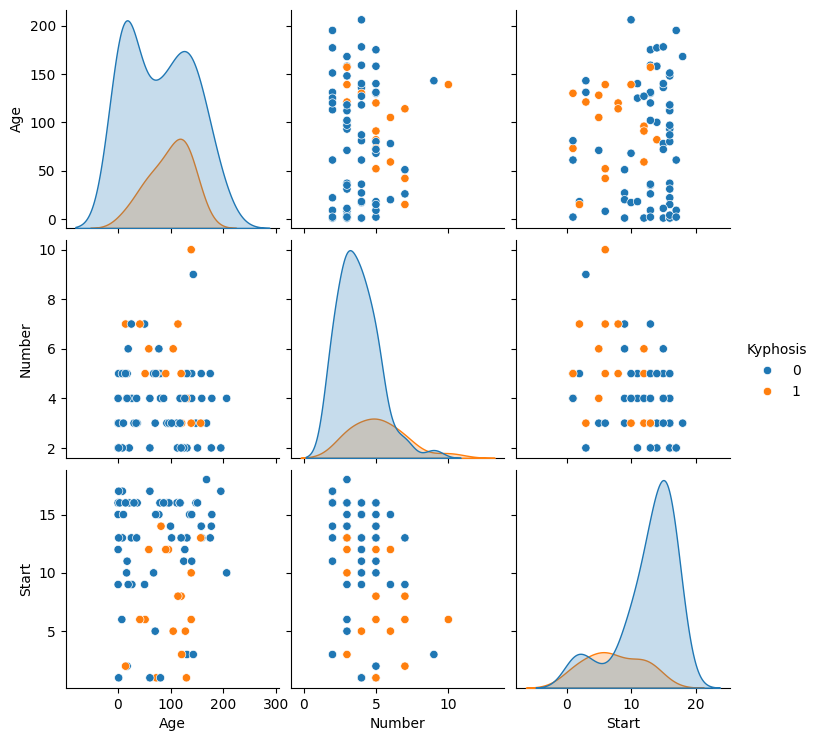

In [182]:
sns.pairplot(data=df, hue='Kyphosis')